In [ ]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [ ]:
load_data = pd.read_excel("/content/Load Data in kW (2).xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fd8453e96d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd845401310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd845393510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd845393a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd8453fe290>,
  <matplotlib.lines.Line2D at 0x7fd8453feb10>]}

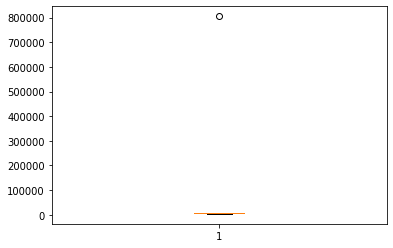

In [ ]:
plt.boxplot(load_data.iloc[:,0])

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [ ]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fd844e734d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd844e78510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd844e7e550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd844e78fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd844e73a50>,
  <matplotlib.lines.Line2D at 0x7fd844e73f90>]}

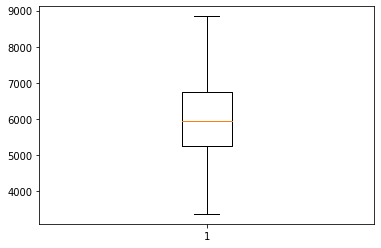

In [ ]:
plt.boxplot(load_data.iloc[:,0])

In [ ]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

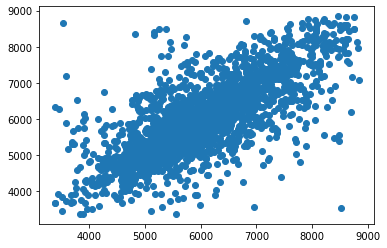

In [ ]:
plt.scatter(x,y)

In [ ]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [ ]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [ ]:
x = minmax_scale(x)
y = minmax_scale(y)

In [ ]:
data = []

for i in range(0,2159):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [ ]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.499271752838517
epoch 0, batch 1, error 0.4705940954761842
epoch 0, batch 2, error 0.4445749147482083
epoch 0, batch 3, error 0.40636705073102586
epoch 1, batch 0, error 0.36450439073993474
epoch 1, batch 1, error 0.32072766453796014
epoch 1, batch 2, error 0.27135627281546393
epoch 1, batch 3, error 0.23412421359996932
epoch 2, batch 0, error 0.19415249265334134
epoch 2, batch 1, error 0.15387622348029295
epoch 2, batch 2, error 0.11924613115965291
epoch 2, batch 3, error 0.093424728874628
epoch 3, batch 0, error 0.07030541526090427
epoch 3, batch 1, error 0.048363703576040036
epoch 3, batch 2, error 0.03405427010978443
epoch 3, batch 3, error 0.024256309960299656
epoch 4, batch 0, error 0.016553511241246256
epoch 4, batch 1, error 0.010779016901442317
epoch 4, batch 2, error 0.009880412707016204
epoch 4, batch 3, error 0.008118561961771182
epoch 5, batch 0, error 0.010489491823385816
epoch 5, batch 1, error 0.012798937958780303
epoch 5, batch 2, error 0.0140

Text(0.5, 1.0, 'error graph')

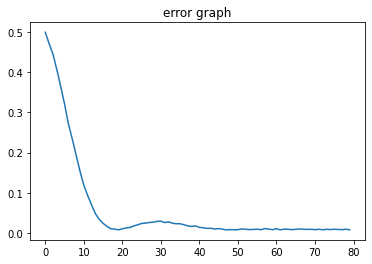

In [ ]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [ ]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.008812483466383724
test error : 0.009086332584863042


In [ ]:
print(m,c)

0.6303256685013262 0.18352200534200183


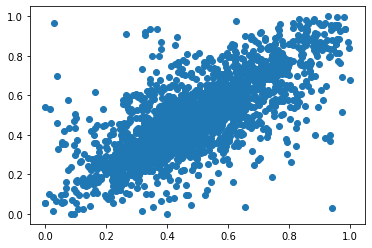

In [ ]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

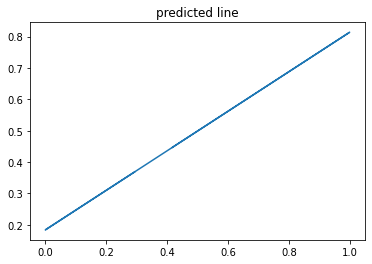

In [ ]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

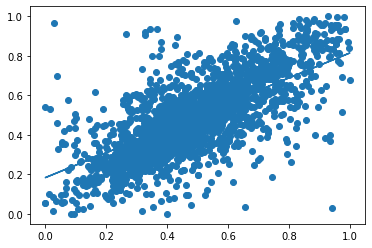

In [ ]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [ ]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4000
predicted load for this hour is :  4772.7511786562945
